In [1]:
import xarray as xr
import data_catalog
import tseries_utils
import esmlab

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
experiment = '1pctCO2-cmip5'
ds_1pctCO2_cmip5 = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_utils.get_tseries(varname, 'atm', 'cam2.h0', experiment)
    ds_1pctCO2_cmip5 = xr.merge((ds_1pctCO2_cmip5, da))
ds_1pctCO2_cmip5_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2_cmip5)
print(ds_1pctCO2_cmip5_ann)

experiment = '1pctCO2-bgc-cmip5'
ds_1pctCO2_bgc_cmip5 = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_utils.get_tseries(varname, 'atm', 'cam2.h0', experiment)
    ds_1pctCO2_bgc_cmip5 = xr.merge((ds_1pctCO2_bgc_cmip5, da))
ds_1pctCO2_bgc_cmip5_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2_bgc_cmip5)
print(ds_1pctCO2_bgc_cmip5_ann)

<xarray.Dataset>
Dimensions:    (time: 140)
Coordinates:
  * time       (time) object 0001-07-02 00:00:00 ... 0140-07-02 00:00:00
Data variables:
    TS         (time) float64 287.4 287.3 287.3 287.4 ... 291.2 291.4 291.4
    co2vmr     (time) float64 0.0002862 0.0002891 0.000292 ... 0.00113 0.001141
    ch4vmr     (time) float64 7.916e-07 7.916e-07 ... 7.916e-07 7.916e-07
    f11vmr     (time) float64 1.248e-11 1.248e-11 ... 1.248e-11 1.248e-11
    f12vmr     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    n2ovmr     (time) float64 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    sol_tsi    (time) float64 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
    SFCO2_LND  (time) float64 0.1788 -1.005 -1.347 ... -2.816 0.4464 -1.67
    SFCO2_OCN  (time) float64 -0.3851 -0.5138 -0.8189 ... -4.983 -5.075 -4.969
<xarray.Dataset>
Dimensions:    (time: 140)
Coordinates:
  * time       (time) object 0001-07-02 00:00:00 ... 0140-07-02 00:00:00
Data variables:
    TS         (time) fl

In [4]:
experiment = '1pctCO2'
ds_1pctCO2 = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_utils.get_tseries(varname, 'atm', 'cam.h0', experiment)
    ds_1pctCO2 = xr.merge((ds_1pctCO2, da))
ds_1pctCO2_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2)
print(ds_1pctCO2_ann)

experiment = '1pctCO2-bgc'
ds_1pctCO2_bgc = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_utils.get_tseries(varname, 'atm', 'cam.h0', experiment)
    ds_1pctCO2_bgc = xr.merge((ds_1pctCO2_bgc, da))
ds_1pctCO2_bgc_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2_bgc)
print(ds_1pctCO2_bgc_ann)

<xarray.Dataset>
Dimensions:    (time: 150)
Coordinates:
  * time       (time) object 0001-07-02 00:00:00 ... 0150-07-02 00:00:00
Data variables:
    TS         (time) float64 288.0 288.2 288.2 288.1 ... 294.1 294.1 294.1
    co2vmr     (time) float64 0.0002847 0.0002873 0.0002902 ... 0.00124 0.001253
    ch4vmr     (time) float64 8.082e-07 8.082e-07 ... 8.082e-07 8.082e-07
    f11vmr     (time) float64 3.211e-11 3.211e-11 ... 3.211e-11 3.211e-11
    f12vmr     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    n2ovmr     (time) float64 2.73e-07 2.73e-07 2.73e-07 ... 2.73e-07 2.73e-07
    sol_tsi    (time) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    SFCO2_LND  (time) float64 -0.1235 -0.05704 -0.4495 ... -4.659 -5.666 -4.352
    SFCO2_OCN  (time) float64 0.2414 -0.2677 -0.5519 ... -4.466 -4.519 -4.593
<xarray.Dataset>
Dimensions:    (time: 150)
Coordinates:
  * time       (time) object 0001-07-02 00:00:00 ... 0150-07-02 00:00:00
Data variables:
    TS   

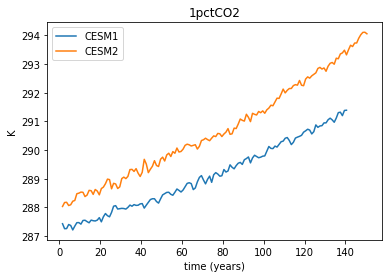

In [5]:
tseries_utils.tseries_plot_1var('TS', [ds_1pctCO2_cmip5_ann, ds_1pctCO2_ann],
                                ['CESM1', 'CESM2'], '1pctCO2')

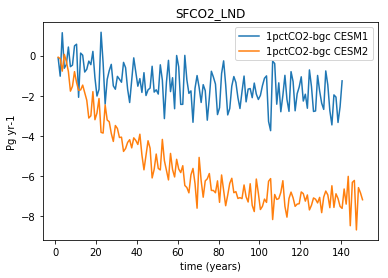

In [6]:
varname = 'SFCO2_LND'
tseries_utils.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                                ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname)

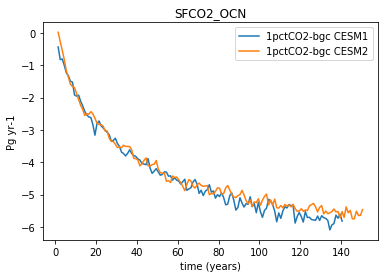

In [7]:
varname = 'SFCO2_OCN'
tseries_utils.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                                ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname)